# Quiz 5

In [132]:
import numpy as np
import re as r
from sympy import *
init_printing()

In [134]:
def coordinates_weights():
    for i in range(1, 5):
        for j in range(1, 5):
            yield(i, j)
            
def total_weight(x0, y0, weight_vector, x_vector):
    total_sum = 0
    coords = coordinates_weights()
    for coord in coords:
        x, y = coord
        wii = "w{}{}".format(x,y)
        xii = "x{}{}".format(x + x0 - 1,y + y0 - 1)
        total_sum += weight_vector[wii] * x_vector[xii]
    return total_sum

xarray = [0, 1, 1, 1, 0,
          0, 0, 0, 1, 0,
          0, 1, 1, 1, 0,
          0, 0, 0, 1, 0,
          0, 1, 1, 1, 0]
          
xvector = dict()
ix = 0
for i in range(1, 6):
    for j in range(1, 6):
        label = "x{}{}".format(i, j)
        xvector[label] = xarray[ix]
        ix += 1

weights_string = "w11w21w31w41=1=0=1=0w12w22w32w42=1=0=1=0w13w23w33w43=1=1=1=1w14w24w34w44=0=0=0=0"
weights = r.findall("w[0-9]{2}", weights_string)
values = r.findall("=[0-9]{1}", weights_string)

wvector = dict()
for weight, value in zip(weights, values):
    wvector[weight] = int(value[1:])

for i in range(1,3):
    for j in range(1,3):
        print("[{},{}]: {}".format(i, j, 
                                   total_weight(i, j, wvector, xvector)))

[1,1]: 4
[1,2]: 8
[2,1]: 2
[2,2]: 4


In [140]:
subs_keys = {h1: "h1", h2: "h2", y: "y", z1:"z1", z2:"z2"}

sigmoid = lambda x: 1 / (1 + exp(-x))
x1, x2, x3, w1, w2, w3, w4 = symbols("x1 x2 x3 w1 w2 w3 w4")
u1, u2, t = symbols("u1 u2 t")

z1 = w1 * x1 + w2 * x2
z2 = w3 * x2 + w4 * x3

h1 = sigmoid(z1)
h2 = sigmoid(z2)

y = h1 * u1 + h2 * u2

E = (t - y) ** 2 / 2

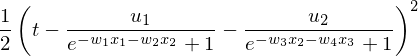

In [142]:
E

In [181]:
(E.diff(w1) + E.diff(w2)).subs(subs_keys).simplify()

In [182]:
(E.diff(w2) + E.diff(w3)).subs(subs_keys).simplify()